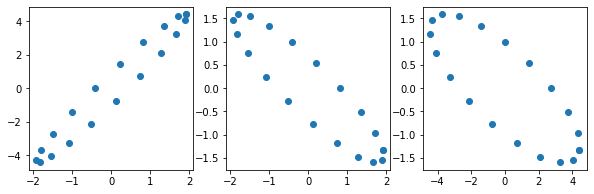

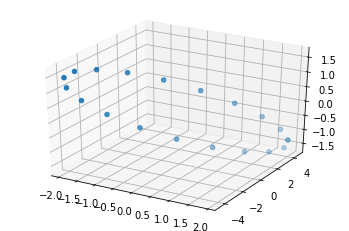

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import cross, eye, dot
from scipy.linalg import expm, norm

n = 20
X = np.zeros((3, n))
t = np.linspace(0, 2*math.pi, n)
X[0,:] = 5*np.cos(t)
X[1,:] = np.sin(t)

M = expm(cross(eye(3), [1, 1, 1]/norm([1, 1, 1])*1.5))
X = np.dot(M, X).transpose()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].scatter(X[:,0], X[:,1])
axes[1].scatter(X[:,0], X[:,2])
axes[2].scatter(X[:,1], X[:,2])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2])
plt.show()

#X = np.array([[1.,0.],[5.,1.],[3.,2.],[4.,5.],[8.,1.],[5.,4.],[3.,5.]])

# cMDS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


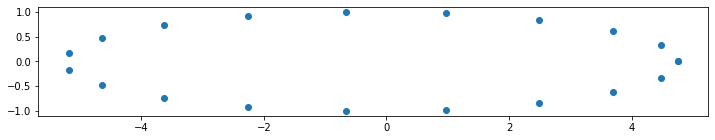

In [ ]:
from scipy.spatial.distance import pdist, squareform

D = squareform(pdist(X))
A = -(1/2)*D**2
C = np.identity(D.shape[0]) - np.ones((D.shape[0], D.shape[0]))/D.shape[0]
B = np.dot(np.dot(C,A),C)

eigenvalues, eigenvectors = np.linalg.eigh(B)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
Y = np.zeros(eigenvectors.shape)
np.fill_diagonal(Y, np.sqrt(eigenvalues))
XY = np.dot(eigenvectors, Y)

plt.figure(figsize=(12, 2))
plt.scatter(XY[:,0], XY[:,1])
plt.show()

# PCA

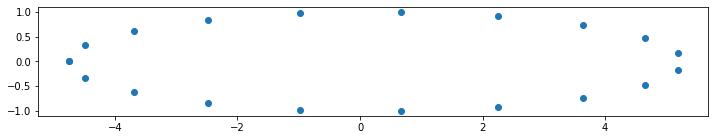

In [ ]:
Xc = X - np.outer(np.ones(X.shape[0]), np.mean(X, axis=0))
U, S, V = np.linalg.svd(Xc, full_matrices=True)
XY = np.dot(Xc, V.transpose())
plt.figure(figsize=(12, 2))
plt.scatter(XY[:,0], XY[:,1])
plt.show()